# TP3 sur la regression logistique multi-classe

### Réalisé par : MULAPI TITA Ketsia

Le but de ce TP est d’implementer un coût softmax, qui sert à étendre la régression logistique pour
la classification multiclasse. Dans ce contexte, la modélisation de la probabilité d’appartenance à
une classe est donnée par :

In [279]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

où C est le nombre de classes, et wk est un vecteur de R^d. On appelle cette fonction, la fonction softmax.

$ p(y = λ_k|x_i) $ est modélisé par la focntion softam ci-dessus. 

Vous allez implémenter dans ce TP, un modèle linéaire multiclasse appris tel que :

En considérant que yi,j représente la probabilité d’appartenance à une classe λj de l’exemple xi
, la
fonction de coût cross-entropy s’écrit :

où yˆi,j = p(y = λk|xi) est modélisé par la fonction softmax ci-dessus. Vous allez implémenter dans ce TP, un modèle linéaire multiclasse appris tel que

où W représente une matrice de taille d × C contenant l’ensemble des {w_k}

> Commencez par charger les données relatives à un problème de reconnaissance de chiffres
manuscrits :

In [280]:
import numpy as np
from sklearn.datasets import load_digits
n_class = 10
X,y = load_digits(n_class=n_class , return_X_y=True)

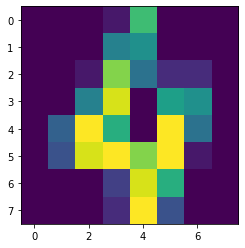

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.imshow(X[4].reshape(8,8))

Implémentez les fonctions permettant :
    
    ◦ de transformer les étiquettes des données en vecteurs de probabilités d’appartenance aux
    classes, à l’aide d’un encodage one-hot 2
    . Bien entendu, pour les données d’apprentissage,
    ces probabilités sont soit égales à 1 (pour la classe à laquelle appartient la donnée), soit
    égale à 0 (pour les autres classes).
    
    ◦ d’évaluer une fonction softmax étant donné un z = x
    >w
    
    ◦ d’estimer la probabilité d’appartenance d’un ensemble de données étant donné W

In [282]:
def oneHotEncodage(y, n_class):
    '''
        Cette fonction renvoie une matrice N,n_class qui
        représente pour chaque exemple l'appartenance à une classe sur n_class total.
        0 : n'appartient pas à la classe
        1 : appartien à la classe
        n : nombre d'exemples
        y : les vérités terrains
        n_class ::: le nombre de classes
    '''
    n = y.shape[0]
    y_one = np.zeros((n,n_class))
    for i in range(n):
        y_one[i,y[i]]=1
    return y_one

In [283]:
def softmax(z):
    ''' 
        cette fonction renvoie pour chaque exemples un ensemble de n_class "probabilités"
        z ::: on sait que z = X^⁽T⁾@Wk un vecteur
    '''
    # computational trick for numerical stability
    z -= np.max(z)
    sm = (np.exp(z).T/ np.sum(np.exp(z),axis=1)).T
    return sm

In [306]:
def get_prob_pred(X, W):
    '''
        Cette fonction récupère les probabilités d'appartenance d'un exemple pour chaque classe et,
        permet de récupérer l'argument (la classe) à la plus grande probabilité
        X ::: ensemble de données d'e
        W ::: la matrice de taille s x C qui contien tl'ensemble des {Wk} 
    '''
    probs = softmax(X@W) # 
    preds = np.argmax(probs, axis=1)
    print("probs : ",probs)
    print("\npreds : ",preds)
    return probs, preds

Implémentez maintenant une fonction qui calcule la fonction de coût et le gradient.

In [285]:
def get_loss_grad(W,X,y,lam ,n_class):
    '''
    Cette focntion renvoie une valeur loss et, 
    un gradient sous forme de matrice ayant la même taille que W
    '''
    # convert the integer class coding into a one-hot representation
    y_mat = oneHotEncodage(y,n_class) 
    # compute raw class scores given our input and current weights
    scores = X@W 
    # perform a softmax on these scores to get their probabilities
    prob = softmax(scores)     
    # insérer votre code ici
    n = X.shape[0]
    loss = (-1/n) * np.sum(y_mat * np.log(prob)) + (lam/2) * np.sum(W.T@W)
    grad = (-1/n) * X.T @ (y_mat - prob) + lam * W # 
    return loss , grad

. Implémentez une descente de gradient sans backtracking pour optimiser les paramètres W

In [355]:
def steepest_descent_without_backtracking(X, y, n_class, methode, lam=1):
    '''
    Cette focntion implémente la méthode de descente de gradient
    avec un pas fixe !
    elle renvoi alors un vecteur de loss et, la matrice W
    '''
    W = np.zeros([X.shape[1],len(np.unique(y))]) # o au départ
    pas = 0.01
    losses = []
    iter_max = 1000
    for i in range(iter_max):
        loss, grad = methode(W,X,y,lam,n_class)
        losses.append(loss)
        W = W - pas*grad
    print(grad.shape)
    print(loss)
    print(W.shape)
    return W, losses

## Problème de classification des chiffres manuscits

## Évaluez l’erreur en classification sur les données d’apprentissage après entrainement

### Etape 1 : apprentisssage (entraînement de l'algorithme, recherche des paramètres W)

In [356]:
W, losses_without_backtrack = steepest_descent_without_backtracking(X_train,y_train,n_class,get_loss_grad)

(64, 10)
0.27025718025443
(64, 10)


### Etape 2 : On prédit ... ON obtient les probabilités et les predicitions

In [357]:
prob, pred = get_prob_pred(X_test,W)

probs :  [[7.43108574e-03 6.37728182e-03 2.45532057e-03 ... 2.24247537e-03
  1.53034033e-02 5.74827342e-03]
 [2.11082024e-02 3.54513871e-03 3.79963027e-03 ... 1.08462409e-02
  1.78251579e-02 7.75982019e-01]
 [4.31581759e-04 2.08373195e-03 6.64007460e-03 ... 1.95010767e-03
  1.75296048e-02 1.33591848e-02]
 ...
 [1.83170014e-02 2.84736986e-03 2.70287856e-04 ... 3.05911204e-03
  4.14473026e-03 1.56023760e-04]
 [5.13595485e-03 1.97179495e-03 3.85293988e-03 ... 1.93908572e-03
  4.18405884e-02 8.91737764e-01]
 [9.23748357e-01 3.61868969e-04 3.30557130e-02 ... 2.84150355e-03
  1.03070041e-02 9.61864298e-03]]

preds :  [6 9 3 7 2 2 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 8 6 5 7 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5

In [358]:
pred

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 0, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

### Etape 3 : On récupère les y_test sous la forme multiclasse

In [359]:
 y_one = oneHotEncodage(y_test,10)

In [360]:
y_one

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

On peut déjà voir que notre prediction est à peu près correcte car à 1 = 9 pour y_one et, 9 pour preds.

pareille pour (n-1) et n

on vérifie qu'on a bien 1 :

In [361]:
sum(y_one[0,:])

1.0

### On évalue les performances de notre modèle : 

In [362]:
def eval_score(X, y, w, n_class):
    '''
    Cette fonction renvoi le taux d'erreur en classification et, 
    le taux de bonne classification.
    elle attend :
    X : le X à utiliser pour la prédiciton
    y : la réalité
    w : les paramètres du modèles après entraînement
    n_class : le nombre de classe
    '''
    n = len(y)
    prob, pred = get_prob_pred(X,w)
    accuracy_score = sum(pred == y)/n
    return 1-accuracy_score, accuracy_score, 

D'abord on vérifie avec les mêmes données utilisés pour l'entraînement, on sera content de voir que l'on s'est permit un minimum d'erreur et donc que l'on ne sur apprend pas.

In [363]:
tx_err_train, tx_train = eval_score(X_train, y_train, W,n_class)

probs :  [[5.57713593e-04 8.71628026e-01 6.02530796e-04 ... 1.37384225e-03
  2.81184420e-02 4.60222123e-02]
 [2.15031035e-04 8.35648338e-01 6.44560284e-02 ... 1.62789351e-02
  4.75404402e-02 1.24644548e-03]
 [6.42719898e-03 1.80008621e-02 4.84755382e-02 ... 4.74092937e-02
  8.06153851e-01 2.04954879e-02]
 ...
 [1.62130746e-03 7.60244660e-03 8.68765987e-01 ... 5.35399019e-02
  2.73368334e-02 2.54314244e-03]
 [1.78476269e-02 5.61184310e-02 1.36148299e-02 ... 5.45031848e-01
  5.81031630e-02 3.38014120e-02]
 [3.85294277e-03 7.43748462e-01 2.31409986e-02 ... 2.17099098e-02
  9.88056483e-02 2.50423343e-03]]

preds :  [1 1 8 ... 2 7 1]


In [364]:
print("Le taux d'erreur en apprentissage est : ",tx_err_train, " soit ", tx_err_train*100,'% et donc, le taux de bonne classification des données entraînés est :',tx_train, " soit : ",tx_train*100)

Le taux d'erreur en apprentissage est :  0.029093931837073983  soit  2.9093931837073983 % et donc, le taux de bonne classification des données entraînés est : 0.970906068162926  soit :  97.0906068162926


In [365]:
tx_err_test, tx_test = eval_score(X_test, y_test, W, n_class)

probs :  [[7.43108574e-03 6.37728182e-03 2.45532057e-03 ... 2.24247537e-03
  1.53034033e-02 5.74827342e-03]
 [2.11082024e-02 3.54513871e-03 3.79963027e-03 ... 1.08462409e-02
  1.78251579e-02 7.75982019e-01]
 [4.31581759e-04 2.08373195e-03 6.64007460e-03 ... 1.95010767e-03
  1.75296048e-02 1.33591848e-02]
 ...
 [1.83170014e-02 2.84736986e-03 2.70287856e-04 ... 3.05911204e-03
  4.14473026e-03 1.56023760e-04]
 [5.13595485e-03 1.97179495e-03 3.85293988e-03 ... 1.93908572e-03
  4.18405884e-02 8.91737764e-01]
 [9.23748357e-01 3.61868969e-04 3.30557130e-02 ... 2.84150355e-03
  1.03070041e-02 9.61864298e-03]]

preds :  [6 9 3 7 2 2 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 8 6 5 7 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5

Maintenant, on évalue convenablement notre modèle avec des données qu'il n'a jamais vu : X_test ici on sera content d'avoir une très bonne performance.

In [366]:
print("Le taux d'erreur en apprentissage est : ",tx_err_test, " soit ", tx_err_test*100,'% et donc, le taux de bonne classification des données entraînés est :',tx_test, " soit : ",tx_test*100)

Le taux d'erreur en apprentissage est :  0.045454545454545414  soit  4.545454545454541 % et donc, le taux de bonne classification des données entraînés est : 0.9545454545454546  soit :  95.45454545454545


## Affichez l’évolution de la fonction objective après chaque itération

In [367]:
from matplotlib import pyplot as plt

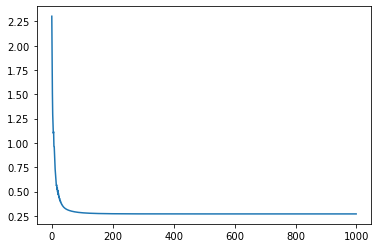

In [368]:
plt.plot(losses_without_backtrack)

#### Constat :

On remarque que plus on iter plus notre fonction de perte décroit de façon assez intérressante et donc, cela nous rassure que avec le pas fixe de 0.01 que l'on s'est fixé, l'algorithme de descente de gradient converge correctement ce qui explique les bons taux de performances obtenus.